# Naive Bayes

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
data_path = '../preprocessing/preprocessed.csv'
data = pd.read_csv(data_path)

# Separate features and target variable
X = data.drop('price_category', axis=1)
y = data['price_category']

# Filter features with low variance
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]

## Train/test split

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42, stratify=y)

## Basic model

### Creation and training

In [4]:
# Create the Naive Bayes model and train it
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

### Evaluation

Accuracy: 0.5701

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.81      0.73      1335
           2       0.51      0.36      0.42      1275
           3       0.54      0.24      0.34      1325
           4       0.44      0.74      0.55      1287
           5       0.73      0.70      0.71      1301

    accuracy                           0.57      6523
   macro avg       0.58      0.57      0.55      6523
weighted avg       0.58      0.57      0.55      6523



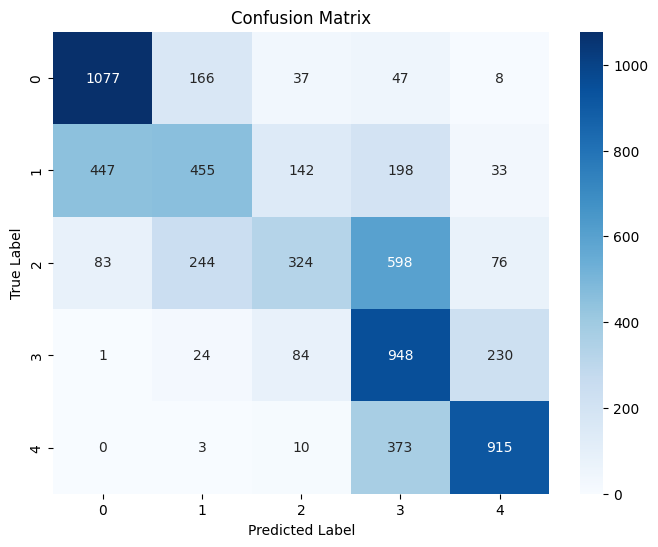

In [5]:
# Use the model to make predictions
y_pred = nb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Cross-Validation

In [6]:
# 5-Fold Cross-Validation
scores = cross_val_score(GaussianNB(), X_filtered, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Average CV Accuracy: {np.mean(scores):.4f}")

Cross-Validation Accuracy Scores: [0.44033111 0.30381785 0.28955842 0.35924563 0.47539098]
Average CV Accuracy: 0.3737
